<a href="https://colab.research.google.com/github/khushbuchuahan3/Consumer_complaint/blob/main/complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Import Libraies**

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text  import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')

#**2 import Datasets**

In [2]:
#import datasets
data=pd.read_csv("/content/drive/MyDrive/complaints.csv")

#**3.Data Undestanding**

In [3]:
#Pick up nessasary columns
data=data[['Product', 'Consumer complaint narrative']]

In [4]:
#check whether any null value avilible 
data.isnull().sum()

Product                               0
Consumer complaint narrative    1653441
dtype: int64

In [5]:
#Drop null values
data=data.dropna()

In [6]:
#Number of rows and columns
data.shape

(888973, 2)

In [7]:
#Data Type 
data.dtypes

Product                         object
Consumer complaint narrative    object
dtype: object

In [8]:
#Rename column name to easy interpritation
data.columns=['product','complaint']

In [9]:
#Encode the object as an enumerated type or categorical variable
data['category_id'] = data['product'].factorize()[0]


In [10]:
#drop_duplicates() method helps in removing duplicates from the data frame
#Returns a sorted Data Frame with Same dimensions as of the function caller Data Frame.
complain_df=data[['product','category_id']].drop_duplicates().sort_values('category_id').reset_index(drop=True)
category_id_df=dict(complain_df.values)
category_id_df

{'Bank account or service': 11,
 'Checking or savings account': 0,
 'Consumer Loan': 9,
 'Credit card': 14,
 'Credit card or prepaid card': 2,
 'Credit reporting': 12,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Debt collection': 4,
 'Money transfer, virtual currency, or money service': 8,
 'Money transfers': 16,
 'Mortgage': 3,
 'Other financial service': 15,
 'Payday loan': 10,
 'Payday loan, title loan, or personal loan': 7,
 'Prepaid card': 13,
 'Student loan': 6,
 'Vehicle loan or lease': 5,
 'Virtual currency': 17}

In [11]:
#Top 5 rows of datasets.
data=data.reset_index(drop=True)
data.head()

,product,complaint,category_id
0,Checking or savings account,This Bank FNBO is terrible! Stay away from the...,0
1,"Credit reporting, credit repair services, or o...",First Progress Card was notified throughout th...,1
2,"Credit reporting, credit repair services, or o...","As by Law, under 15 U.S Code 1601- Congression...",1
3,"Credit reporting, credit repair services, or o...",This is a copy of my most recent email to XXXX...,1
4,Credit card or prepaid card,This is in reference to case number XXXX. This...,2


In [12]:
# Input: Consumer_complaint_narrative
# Output: product

#**4.Imbalance Data**

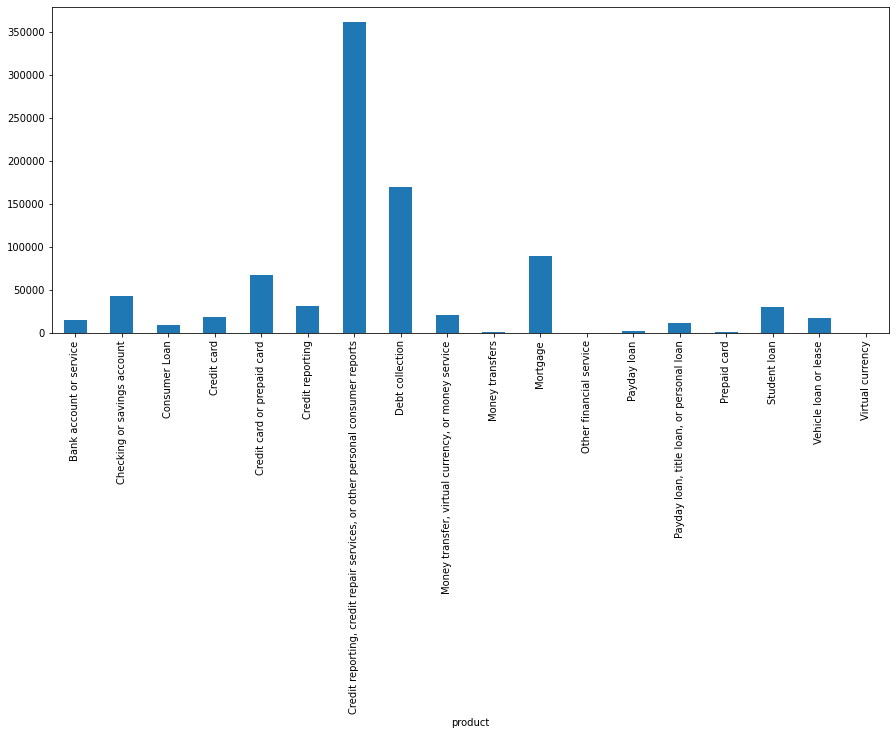

In [13]:
plt.figure(figsize=(15,6))
data.groupby("product").complaint.count().plot.bar()
# We see that the number of complaints per product is imbalanced. 
# Consumers’ complaints are more biased towards Debt collection,Credit reporting and Mortgage.

In [14]:
# calculate a tf-idf vector for each of consumer complaint narratives:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfid=TfidfVectorizer(stop_words='english',  #stop_words is set to "english" to remove all common pronouns ("a", "the", ...)
                     norm='l2',             #ensure all our feature vectors have a euclidian norm of 1
                     sublinear_tf=True,     #set to True to use a logarithmic form for frequency.
                     encoding='latin-1',    #maps possible byte values to first Unicode code points,ensures decoding errors will never occur regardless of the configured error handler
                     min_df=5,        # minimum numbers of documents a word must be present in to be kept.
                    ngram_range=(1,2)) #set to (1, 2) to indicate that we want to consider both unigrams and bigrams 

In [16]:
#We Randomly pick up 10000 data for easy interpretation
data=data.sample(10000,random_state=12).reset_index(drop=True,)
data.head()

,product,complaint,category_id
0,Student loan,I was charged {$42.00} per month for the past ...,6
1,Mortgage,"My mortgage servicer, Nationstar Mortgage, is ...",3
2,Debt collection,I have been receiving numerous phone calls fro...,4
3,"Credit reporting, credit repair services, or o...","I faxed over a copy of my drivers license, soc...",1
4,Credit card,I SAW PROMOTION FOR CREDIT CARD ON XXXX FOR WE...,14


In [17]:
#Define Fetures and labels
fetures=tfid.fit_transform(data.complaint).toarray()
labels=data.category_id

In [18]:
#devide train and test dataset
x_train,y_test,y_train,y_test=train_test_split(data['complaint'],data['product'],random_state=0)

In [19]:
# tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.
cv=CountVectorizer()
x_train_count=cv.fit_transform(x_train)

In [20]:
# Transform a count matrix to a normalized tf or tf-idf representation.
tfid_transformer=TfidfTransformer()
x_train_tfid=tfid_transformer.fit_transform(x_train_count)

In [21]:
# Naive Bayes Classifier .the one most suitable for word counts is the multinomial variant.
clf=MultinomialNB().fit(x_train_tfid,y_train)

#**5.prediction**

In [22]:
data[data['complaint']== "I have been monitoring my credit report with Transunion only for about 3 months. I had an identity theft a few years ago and it was never resolved. I was forced into a bankruptcy in 2015. I have been working very hard to get my credit repaired, but Transunion seems to be very careless about what they put on a person 's report. They have multiple inaccuracies, first, I have an auto loan with XXXX XXXX XXXX. I am showing as about 6 months late payments. This loan is in litigation with the XXXX XXXX XXXX for harassing collection calls made to me when my payments were not late. Since the attorney took this case, XXXX has mailed me back every payment I have sent them. They will not talk to me at all about the account, saying that everything is on hold pending the resolution of this. They will not make this known to Transunion. \nAlso, I have disputed several times collection accounts that have appeared on the report. These are not my accounts. They will not remove them. I also have some medical collections which should not be there, as to my knowledge, my insurance covered. I was told by the doctor that I have no copay and did not owe anything, yet these remain. \nToday I received a notice that a new collection went on, but I can not find it. It took 80 points from my score. \nThe only item new is the report showing that I used my credit card. \nThe other issue is that I want an explanation as to why a credit score determines what you have to pay for Car Insurance, House Insurance, Life Insurance, and whether you can have a bank account. This is OUTRAGEOUS! There is NO VALID reason why this should be as it is. \nThese Credit Reporting Bureaus should be ABOLISHED!! They are causing untold destruction to people who have had things happen that are NOT in their CONTROL!"]

,product,complaint,category_id
9998,"Credit reporting, credit repair services, or o...",I have been monitoring my credit report with T...,1


In [23]:
print(clf.predict(cv.transform(['After receiving this paper bill through the mail, I called my dental office to verify. My dental office said I was all paid up and had a XXXX balance. The office XXXX confirmed that the bill was fraudulent, which is why I decided not to contact them but report them instead.'])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [24]:
data[data['complaint']=='After receiving this paper bill through the mail, I called my dental office to verify. My dental office said I was all paid up and had a XXXX balance. The office XXXX confirmed that the bill was fraudulent, which is why I decided not to contact them but report them instead.']

,product,complaint,category_id
9996,Debt collection,After receiving this paper bill through the ma...,4


In [25]:
print(clf.predict(cv.transform(["In XXXX I got an American Express card, In XXXX I was not receiving my bills, I contacted American Express, They told me that my account was placed with a collection agency. I received several calls from a collection agency call XXXX  about the account. In XXXX I sent a letter to get the debt validated. See attach. \n\nI called them in XXXX for a follow-up and was told they no longer had the account. I called American Express and informed them that the company is no longer holding the account and they never validated the debt. I explain to them that I sent them a validation letter and got no response. \n\nWhen I called in XX/XX/XXXX, I was told the account charged off. In the month of XXXX, I received 8 phone calls of harassment from a company called XXXX XXXX, I asked them to validate the debt, I sent them a letter to validate the debt, They never did. When I followed up with them, I was told they no longer had the debt. \n\nThey told me it was back with American Express, I called American Express collection to speak about the bill and they were rude to me and never validated the debt. I asked to send me the bill by email because I had to move out of the country. They refused. \n\nI've tried for many years to get the debt validated and got no way. The statue of limitation for them to sue me has passed. They had my wrong address, they did not validate the debt. I ran my credit report yesterday only to find out that they put the debt back on my account. \n\nI contacted them and they said because I disputed it, they put it back on my account. This is really some XXXX. I do not owe this debt, It's on my three credit report",])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [26]:
#Prediction
print(clf.predict(cv.transform(['On XX/XX/2021 my unemployment weekly amount was put on my Way2go card. Immediately after I transferred the entire amount to my XXXX XXXX XXXX account. They claim it takes 3 - 4 business days but it has never cleared with XXXX. I spoke with 3 different customer reps. at Way2go and they are all giving me the rundown that I need to be patient. Today is the XXXX & I have spoken with XXXX a couple of times. They have no record of any pending transfers from Way2go. The last message from Way2go said that it could take up to 5 weeks to resolve any issues. This is ridiculous I need my money to be put back into my account. I have XXXX $ presently in the account from this weeks payment. I am missing last weeks payment which should equal total of {$720.00} in my account as of today. Please help me. Thanks',])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [27]:
data[data['complaint']=='My mortgage servicer, Nationstar Mortgage, is attempting to perform a foreclosure sale on my property, by using falsified documents. There are many discrepancies on who actually is the owner/certificate holder of my mortgage. The documents Nationstar has provided, lists XXXX XXXX. Yet, in doing research, XXXX XXXX Associates have verified that there is no connection to my mortgage and their locations. Because my mortgage loan was apparently securitized, the paper work in the apparent transfers were not properly performed. Thank you for your time and attention in this matter. XXXX XXXX']

,product,complaint,category_id
1,Mortgage,"My mortgage servicer, Nationstar Mortgage, is ...",3


In [28]:
print(clf.predict(cv.transform(['I recently applied for a home loan and was denied do to fraudulent activities. I have never applied for AMEX or have I used this credit card. I have recently tried to dispute this directly with the bureaus and asked for an Itemized bill, they verified as accurate. The reason why I asked for this is because I was served in XXXX for XXXX XXXX XXXX and hired an Attorney XXXX XXXX. We were able to prove I never used it and my signature from the one on the application was different. They also showed me an itemized bill There were charges to flights to XXXX, AZ and other places. I showed my passport to show proof that this was never me who took these vacations or that I used it. There was no stamp of indication that I have ever flown out of Colorado, it was plain. They came to the conclusion it was not me and dismissed it. I proved that this was not me who took this CC out but my EX- Husband. We showed the divorce papers to show that we had divorced in XX/XX/XXXX and he would be the only person that could have done this since he would have had my personal information. I am willing to do the same thing for AMEX. I have never applied nor used their CC.',])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [29]:
#Predition
print(clf.predict(cv.transform(['This company did not even give Me a chance to pay. Three people signed our lease agreement, our father just cosigned. The bill in question was always going to be paid but we never got a bill, yesterday Our father was served with an intent to file, even though we are the actual signees, and they will not allow us to even set up a payment plan. Our father speaks broken english but has assets, and they are trying to take advantage of him and scare him into paying them in full by making him think he will lose everything if he doesnt cut them a check in full for our bill. These people are preying on someone who they know doesnt fully understand the situation.'])))

['Credit reporting, credit repair services, or other personal consumer reports']


#**6.Model Building**

In [30]:
#Split data in training and testing
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(fetures, labels, data.index, test_size=0.33, random_state=0)

In [31]:
# The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide,
# returning a "best fit" hyperplane that divides, or categorizes, your data. 
#Build the model
model=LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

#**7.Model Testing**

In [32]:
#Predict test data with help of model
y_pred=model.predict(x_test)

In [33]:
#Summary of the number of correct and incorrect predictions made by a classifier.
con_matrix=confusion_matrix(y_test,y_pred)

**7.1 Heat Map**

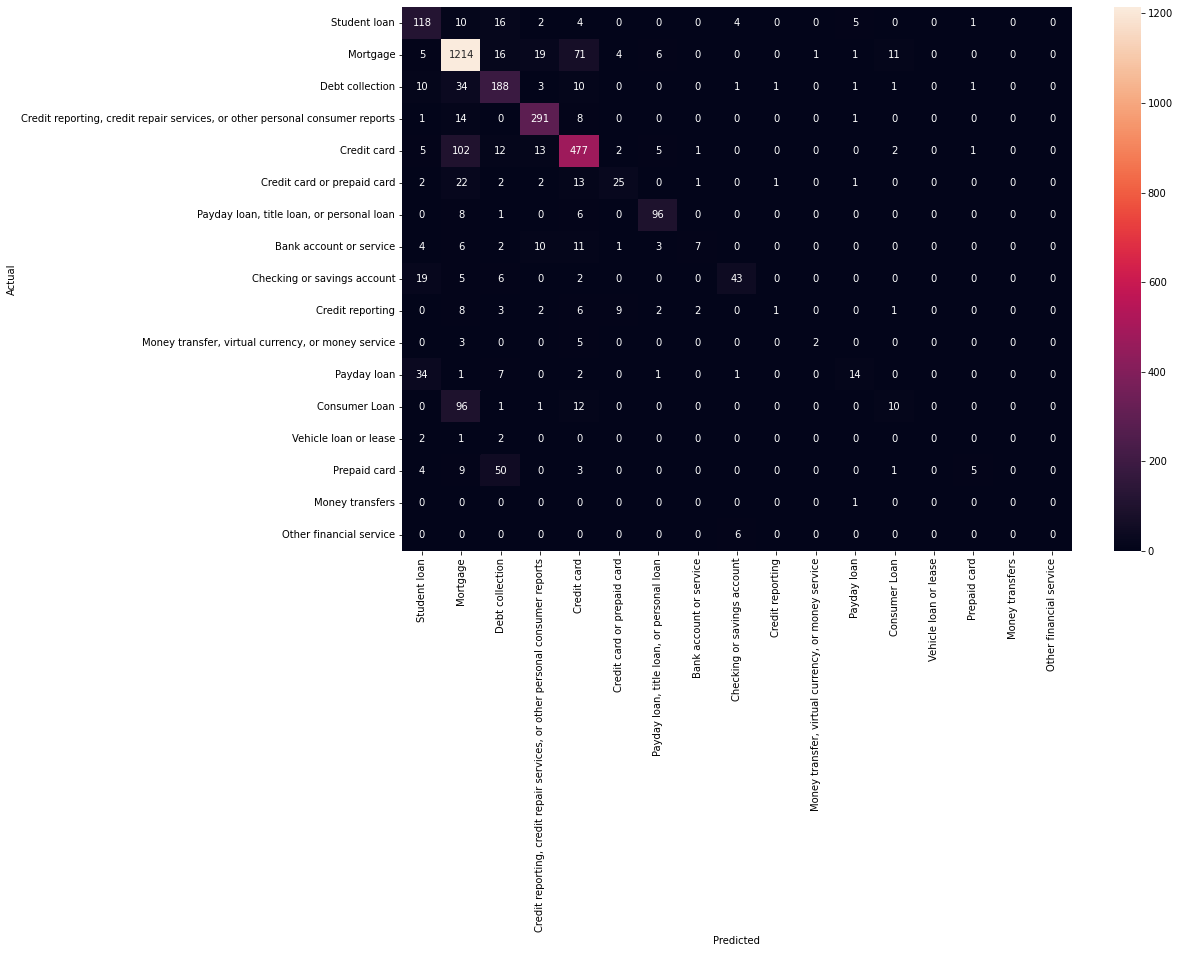

In [34]:
#Plot Heat map
#Heatmap contains values representing various shades of the same colour for each value to be plotted
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(con_matrix,annot=True,fmt='d',xticklabels=data['product'].unique(),yticklabels=data['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**7.2 classification report**

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       204
           1       0.90      0.79      0.84      1533
           2       0.75      0.61      0.68       306
           3       0.92      0.85      0.88       343
           4       0.77      0.76      0.76       630
           5       0.36      0.61      0.45        41
           6       0.86      0.85      0.86       113
           7       0.16      0.64      0.25        11
           8       0.57      0.78      0.66        55
           9       0.03      0.33      0.05         3
          10       0.20      0.67      0.31         3
          11       0.23      0.58      0.33        24
          12       0.08      0.38      0.14        26
          13       0.00      0.00      0.00         0
          14       0.07      0.62      0.12         8
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0

    accuracy              

In [36]:
#From we get 75% accuracy 